Assigment 1

In [1]:
#Import library yang dibutuhkan
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
#mengambil dan membaca dataset
df = pd.read_csv("london_crime_by_lsoa.csv")

In [8]:
#mengurutkan data berdasarkan tahun
df.sort_values(by='year', ascending=True, axis=0, inplace=True)

In [10]:
#membuat df1 untuk value yang memiliki nilai 2
df1=df[df["value"] == 2]
df1

,lsoa_code,borough,major_category,minor_category,value,year,month
1315511,E01004204,Tower Hamlets,Violence Against the Person,Common Assault,2,2008,9
8512169,E01002676,Hounslow,Drugs,Possession Of Drugs,2,2008,9
5807242,E01002999,Kingston upon Thames,Theft and Handling,Other Theft,2,2008,11
5807318,E01004444,Waltham Forest,Theft and Handling,Theft From Motor Vehicle,2,2008,12
8512129,E01003524,Newham,Burglary,Burglary in a Dwelling,2,2008,5
...,...,...,...,...,...,...,...
6170896,E01002769,Islington,Theft and Handling,Other Theft Person,2,2016,1
6171695,E01004300,Tower Hamlets,Violence Against the Person,Common Assault,2,2016,5
6171315,E01003319,Lewisham,Violence Against the Person,Common Assault,2,2016,7
11948521,E01000072,Barking and Dagenham,Violence Against the Person,Common Assault,2,2016,6


In [11]:
#melihat 5 record teratas
df1.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
1315511,E01004204,Tower Hamlets,Violence Against the Person,Common Assault,2,2008,9
8512169,E01002676,Hounslow,Drugs,Possession Of Drugs,2,2008,9
5807242,E01002999,Kingston upon Thames,Theft and Handling,Other Theft,2,2008,11
5807318,E01004444,Waltham Forest,Theft and Handling,Theft From Motor Vehicle,2,2008,12
8512129,E01003524,Newham,Burglary,Burglary in a Dwelling,2,2008,5


In [12]:
#melihat 5 record terbawah
df1.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
6170896,E01002769,Islington,Theft and Handling,Other Theft Person,2,2016,1
6171695,E01004300,Tower Hamlets,Violence Against the Person,Common Assault,2,2016,5
6171315,E01003319,Lewisham,Violence Against the Person,Common Assault,2,2016,7
11948521,E01000072,Barking and Dagenham,Violence Against the Person,Common Assault,2,2016,6
11948509,E01002394,Hillingdon,Burglary,Burglary in a Dwelling,2,2016,6


In [13]:
#melihat berapa banyak entri pada dataset
print(df1.shape)

(712478, 7)


In [14]:
#melihat list kolom
df1.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [15]:
#memeriksa berapa banyak objek null yang dimiliki
df1.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [30]:
#melihat ringkasan singkat dari setiap kolom dalam dataset
df1.describe()

,value,year,month
count,712478.0,712478.000000,712478.000000
mean,2.0,2011.952361,6.516657
std,0.0,2.606137,3.412787
min,2.0,2008.000000,1.000000
25%,2.0,2010.000000,4.000000
50%,2.0,2012.000000,7.000000
75%,2.0,2014.000000,9.000000
max,2.0,2016.000000,12.000000


In [19]:
#mengecek total kejahatan menurut tahun
df1["year"].value_counts()

2008    83182
2009    81467
2016    80771
2010    80308
2011    79908
2012    78795
2015    78673
2014    75234
2013    74140
Name: year, dtype: int64

In [21]:
#mengecek total kejahatan kecil berdasarkan kategori
totmajor = df1['major_category'].value_counts()
totmajor

Theft and Handling             233039
Violence Against the Person    202091
Burglary                       105451
Criminal Damage                 81161
Drugs                           47719
Robbery                         32053
Other Notifiable Offences       10479
Fraud or Forgery                  391
Sexual Offences                    94
Name: major_category, dtype: int64

In [22]:
#mengecek total kejahatan kecil berdasarkan kategori
totminor = df1['minor_category'].value_counts()
totminor

Theft From Motor Vehicle                  74721
Burglary in a Dwelling                    72191
Other Theft                               65464
Assault with Injury                       59839
Harassment                                59636
Common Assault                            55453
Possession Of Drugs                       45266
Criminal Damage To Motor Vehicle          37004
Burglary in Other Buildings               33260
Theft/Taking Of Motor Vehicle             30919
Personal Property                         30701
Other Theft Person                        20446
Criminal Damage To Dwelling               20017
Theft/Taking of Pedal Cycle               19033
Other Criminal Damage                     17529
Theft From Shops                          16701
Wounding/GBH                              15345
Other Notifiable                          10214
Other violence                             8784
Criminal Damage To Other Building          6611
Motor Vehicle Interference & Tampering  

In [24]:
#menampilkan total kejahatan besar berdasarkan kategori per tahun dalam bentuk tabel
major = df1.pivot_table(values='value', index=['year'],columns=['major_category'], aggfunc=np.sum, fill_value=0)
major

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,24316,25422,12488,782,1888,7676,188,52374,41230
2009,25062,23246,11972,0,2114,7484,0,51198,41858
2010,24246,21020,11532,0,2174,8084,0,52760,40800
2011,25504,18324,11514,0,2018,9082,0,54756,38618
2012,25884,15260,10688,0,2102,8954,0,54874,39828
2013,24728,13186,10366,0,2114,7194,0,50854,39838
2014,21630,14306,9518,0,2520,5208,0,48216,49070
2015,20064,15618,8830,0,2864,5104,0,49452,55414
2016,19468,15940,8530,0,3164,5320,0,51594,57526


In [51]:
#menampilkan total kejahatan kecil berdasarkan kategori per tahun dalam bentuk tabel
minor = df1.pivot_table(values='value', index=['year'],columns=['minor_category'], aggfunc=np.sum, fill_value=0)
minor

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other Theft Person,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH
year,,,,,,,,,,,,,,,,,,,,,
2008,14690,8130,16186,442,10810,544,6876,12324,1828,586,...,3786,1944,7234,11874,24,18166,3678,8454,3586,1910
2009,14252,7744,17318,422,11336,0,6506,10602,1678,540,...,3962,1894,7062,11418,0,17182,3754,7152,4482,2368
2010,14126,7428,16818,414,11426,0,5654,9568,1612,532,...,4508,1672,7670,10968,0,17576,3556,7308,4392,1718
2011,13316,7886,17618,350,11176,0,4666,8280,1476,604,...,4888,1670,8732,10890,0,17692,3462,7498,4630,1674
2012,13222,8038,17846,318,11092,0,3790,6928,1300,486,...,5708,1632,8636,10178,0,18186,3612,6292,4734,1440
2013,11194,7794,16934,240,10416,0,3126,6088,1196,510,...,5572,1970,6954,9832,0,17062,3484,5534,4322,3914
2014,12328,6726,14904,162,13746,0,3002,6334,1326,550,...,3960,1878,5046,8950,0,14706,3742,5876,3938,5624
2015,13002,6504,13560,172,15420,0,3236,6902,1336,490,...,4192,2328,4932,8322,0,14444,3996,5986,3900,5974
2016,13548,6270,13198,184,15484,0,3178,6982,1470,410,...,4316,2580,5136,8100,0,14428,4118,7738,4082,6068


Area Plot

In [28]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

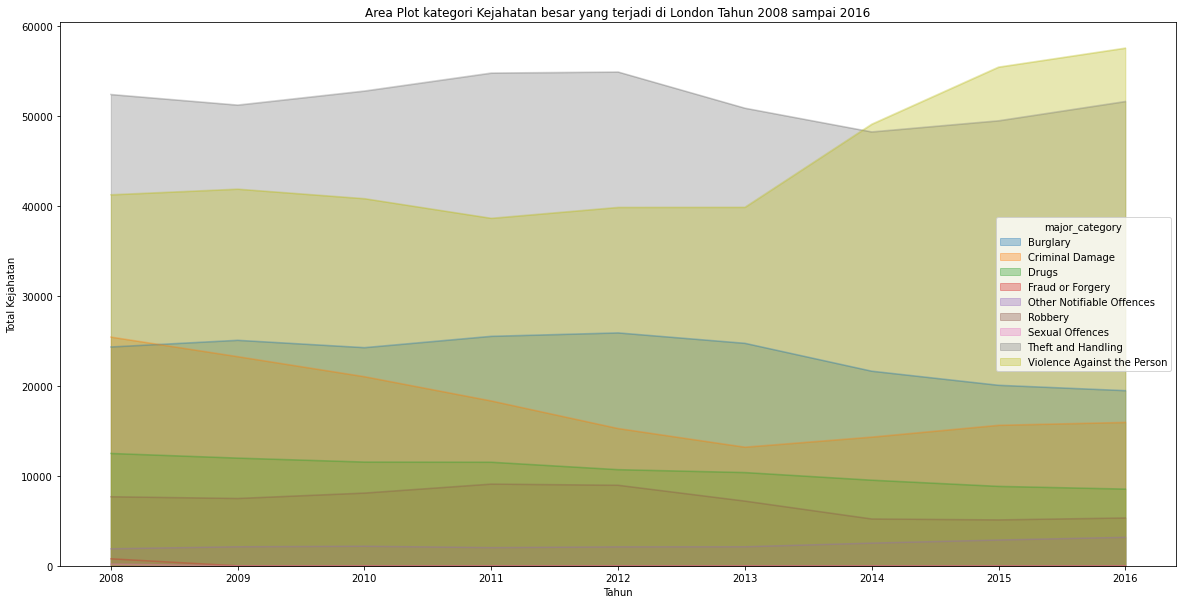

In [43]:
#menampilkan kejahatan besar di London pada tahun 2008 sampai dengan tahun 2016

major.plot(kind='area',
           alpha=0.35,
           stacked=False,
           figsize=(20,10),
           )

plt.title('Area Plot kategori Kejahatan besar yang terjadi di London Tahun 2008 sampai 2016')
plt.ylabel('Total Kejahatan')
plt.xlabel('Tahun')

plt.show()

Berdasarkan area plot diatas dapat disimpulkan bahwa kejahatan besar yang sering terjadi adalah Theft and Handling dengan kisaran lebih dari 50000 kejadian. Tetapi pada tahun 2015 sampai 2016 Violence Against the person menjadi kejahatan yang paling sering terjadi dengan kisaran melebihi Theft and Handling.

Histograms

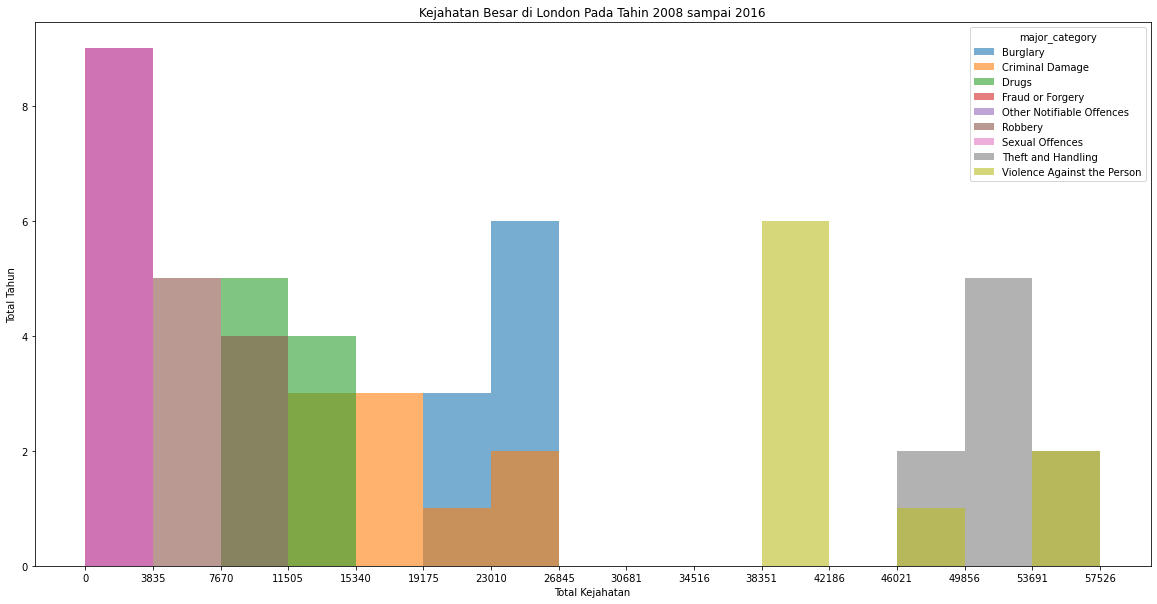

In [47]:
#menampilkan kejahatan besar yang sering terjadi dan minim terjadi
count, bin_edges = np.histogram(major, 15)
major.plot(kind ='hist',
            figsize=(20, 10),
            bins=15,
            alpha=0.6,
            xticks=bin_edges,
            )

plt.title('Kejahatan Besar di London Pada Tahin 2008 sampai 2016')
plt.ylabel('Total Tahun')
plt.xlabel('Total Kejahatan')

plt.show()

Berdasarkan histogram diatas dapat disimpulkan bahwa kejahatan besar yang sering terjadi adalah Violence Againts the person. Sedangkan yang paling minim terjadi adalah Sexual Offences

Bar Charts

In [48]:
#kasus kejahatan di City of London pada tahun 2008
df2 = df1[["borough", "major_category", "minor_category", "year", "month", "value"]][df1.year == 2008]

df2

,borough,major_category,minor_category,year,month,value
1315511,Tower Hamlets,Violence Against the Person,Common Assault,2008,9,2
8512169,Hounslow,Drugs,Possession Of Drugs,2008,9,2
5807242,Kingston upon Thames,Theft and Handling,Other Theft,2008,11,2
5807318,Waltham Forest,Theft and Handling,Theft From Motor Vehicle,2008,12,2
8512129,Newham,Burglary,Burglary in a Dwelling,2008,5,2
...,...,...,...,...,...,...
4990052,Lambeth,Theft and Handling,Theft/Taking Of Motor Vehicle,2008,11,2
9308749,Islington,Fraud or Forgery,Other Fraud & Forgery,2008,2,2
9300931,Westminster,Theft and Handling,Theft From Motor Vehicle,2008,2,2
3346156,Hackney,Violence Against the Person,Offensive Weapon,2008,9,2


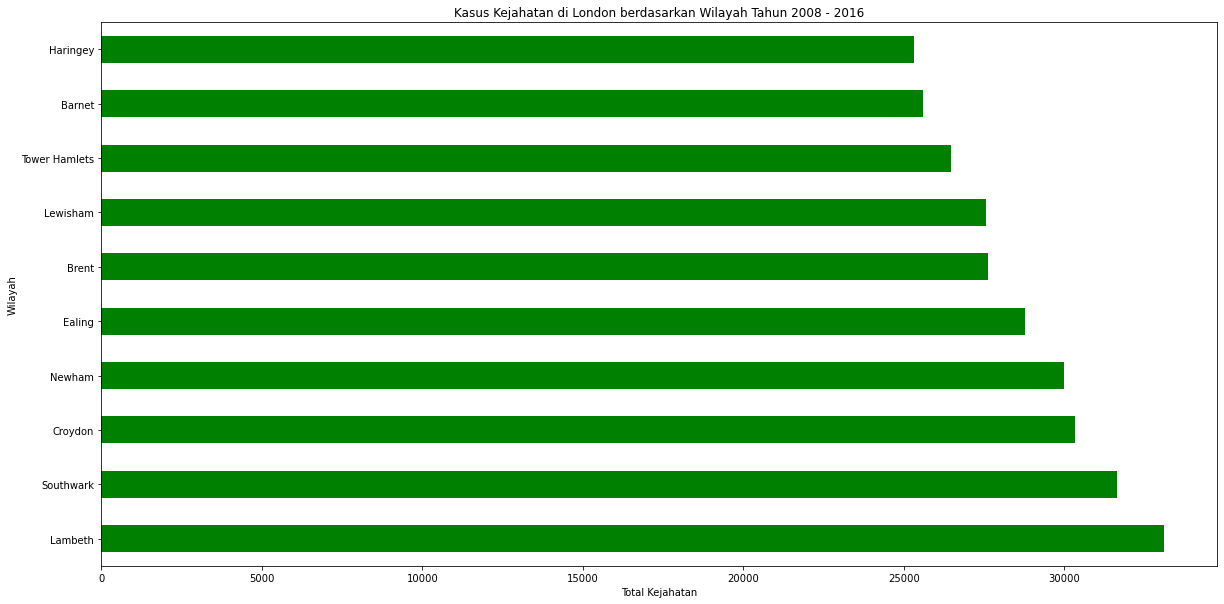

In [61]:
#menampilkan total kejahatan berdasarkan wilayah dari tahun 2008 sampai 2016
totalborough = df1['borough'].value_counts()
barh=totalborough[0:10]

barh.plot(kind='barh', figsize=(20,10), color='green')

plt.xlabel('Total Kejahatan')
plt.ylabel('Wilayah')
plt.title('Kasus Kejahatan di London berdasarkan Wilayah Tahun 2008 - 2016')

plt.show()

Berdasarkan hasil dari bar chart horizontal diatas, dapat disimpulkan bahwa wilayah Lambeth adalah wilayah dengan kasus kejahatan paling banyak dari tahun 2008 sampai 2016 dengan total kejadian 30000 lebih

Pie Charts

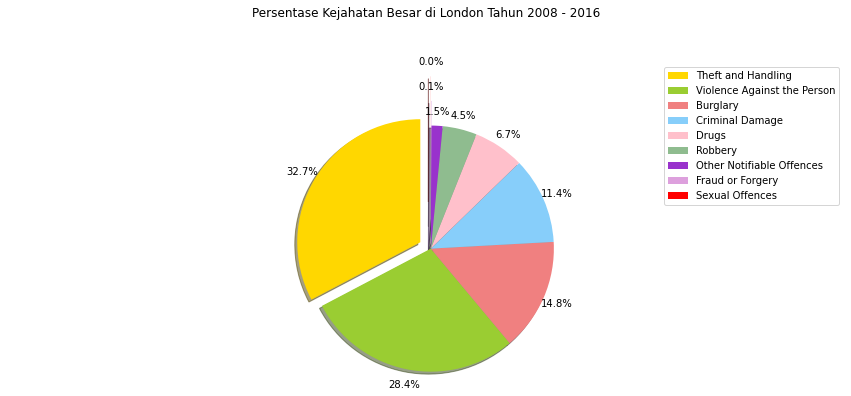

In [64]:
colors_list = ['gold','yellowgreen','lightcoral','lightskyblue','pink','darkseagreen','darkorchid','plum','red']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.2, 0.4]
dfpie = df1.groupby(['major_category']).sum()['value'].sort_values(ascending=False)
dfpie.plot(kind='pie',
           figsize=(15, 6),
           autopct='%1.1f%%',
           startangle=90,
           shadow=True,
           labels=None, 
           colors=colors_list,
           pctdistance=1.12,
           explode=explode_list
          )
plt.title('Persentase Kejahatan Besar di London Tahun 2008 - 2016', y=1.12)
plt.ylabel('')
plt.axis('equal')

plt.legend(labels=dfpie.index, loc='upper right')

plt.show()

Berdasarkan Pie Charts diatas, dapat disimpulkan bahwa presentase kejahatan besar yang paling tinggi ditempati oleh Theft and Handling yaitu sebesar 32.7%

Box Plots

<AxesSubplot:>

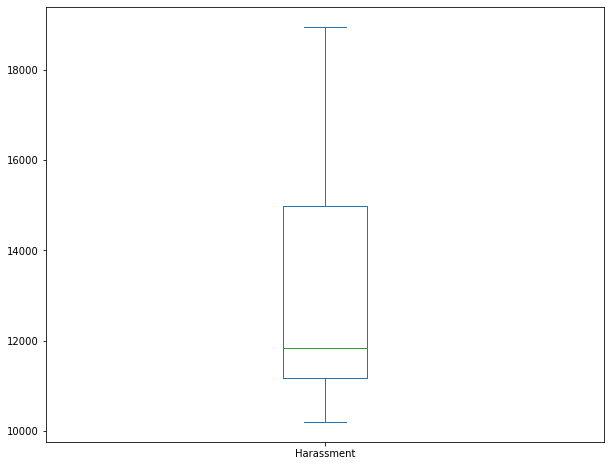

In [65]:
#maksimal kasus kekerasan 
harassment = minor['Harassment']
harassment.plot(kind='box', figsize=(10, 8))

Berdasarkan hasil diatas, dapat disimpulkan bahwa kasus kekerasan di London terjadi maksimal 19000 kasus

Scatter Plots

In [67]:
#melihat perbandingan antara Theft and Handling dengan Violence Against the Person
dfscatter = major[['Theft and Handling','Violence Against the Person']]
dfscatter = dfscatter.reset_index()
dfscatter

major_category,year,Theft and Handling,Violence Against the Person
0,2008,52374,41230
1,2009,51198,41858
2,2010,52760,40800
3,2011,54756,38618
4,2012,54874,39828
5,2013,50854,39838
6,2014,48216,49070
7,2015,49452,55414
8,2016,51594,57526


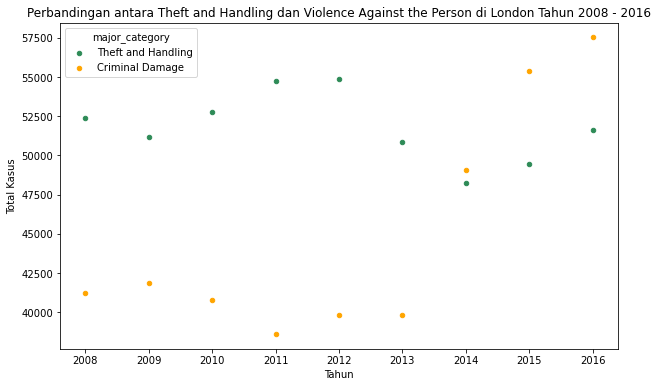

In [69]:
ax1 = dfscatter.plot(kind='scatter', x='year', y='Theft and Handling', figsize=(10, 6), color='seagreen', label='Theft and Handling')
ax2 = dfscatter.plot(kind='scatter', x='year', y='Violence Against the Person', figsize=(10, 6), color='orange',label='Criminal Damage', ax=ax1 )

plt.title('Perbandingan antara Theft and Handling dan Violence Against the Person di London Tahun 2008 - 2016')
plt.xlabel('Tahun')
plt.ylabel('Total Kasus')

plt.show()

Berdasarkan hasil diatas, dapat disimpulkan bahwa kasus Theft and Handling memiliki total kasus lebih dari 47500 setiap tahunnya, dan memiliki nilai yang lebih tinggi dibandingkan dengan Violence Against the Person. Sedangkan Violence Against the Person memiliki total kasus kurang dari 42500 setiap tahunnya, tetapi mulai dari tahun 2014 sampai 2016 Violence Against the Person naik hingga pusatnya pada tahun 2016 memiliki kedudukan kasus tertinggi.

Word Clouds

In [72]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

In [73]:
databorough = ' '.join(df1.borough)

In [74]:
borough_wc = WordCloud(background_color='white',
                       max_words=100,
                       stopwords=stopwords
                       )

# generate the word cloud
borough_wc.generate(databorough)

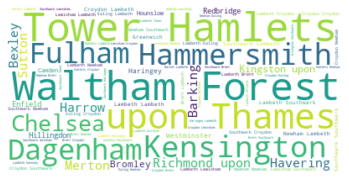

In [75]:
plt.imshow(borough_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [76]:
dataminor = ' '.join(df1.minor_category)

In [79]:
mountain_mask = np.array(Image.open('mountain_mask.png'))

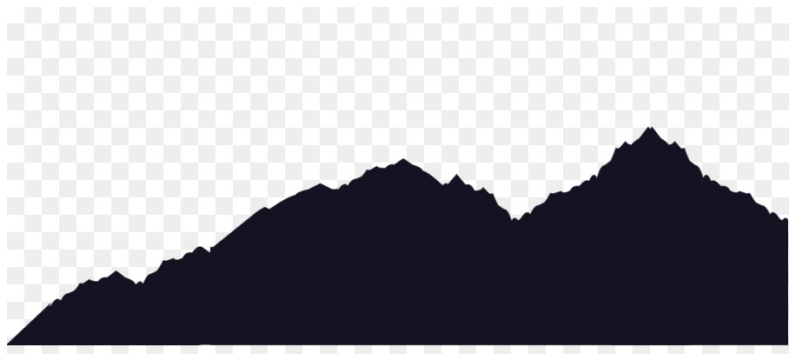

In [80]:
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(mountain_mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

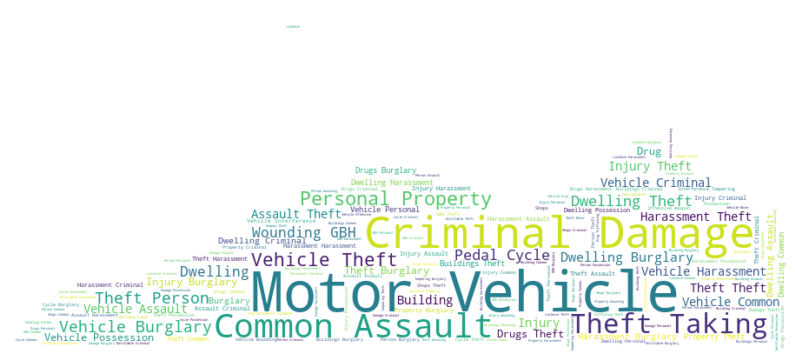

In [81]:
minor_wc = WordCloud(background_color='white', max_words=300,
                    mask=mountain_mask, stopwords=stopwords)

minor_wc.generate(dataminor)

fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(minor_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

Foluim Maps

In [87]:
!pip install folium
import folium

  Using cached branca-0.5.0-py3-none-any.whl (24 kB)


In [88]:
latitude = 51.50
longitude = -0.136

In [89]:
london_map = folium.Map(location=[latitude,longitude], zoom_start=12)
london_map

In [90]:
london_map = folium.Map(location=[latitude,longitude], zoom_start=12, tiles='Stamen Toner')
london_map

Kesimpulan

1. Kejahatan besar yang sering terjadi adalah Theft and Handling dengan kisaran lebih dari 50000 kejadian, tetapi pada tahun 2015 sampai 2016 kejahatan C=Violence Against the Person menjadi kejahatan yang paling sering terjadi dengan kisaran melebihi Theft and Handling
2. Kejahatan besar yang sering terjadi adalah Voilence Againts the Person dan kejahatan besar yang minim terjadi adalah Sexual Offences
3. Wilayah dengan kasus kejahatan terbanyak ditempati oleh Lambeth dengan total kejadian 30000 lebih